<a href="https://colab.research.google.com/github/SantiagoValenciaCarmona/practicas/blob/main/Ejercicios_2_4_~_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desarrollo

**Ejercicio 2.4**

In [ ]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X


*  *Carga netamente resistiva*

THD = 41.6415157628279
DFP = 0.9997249798843942


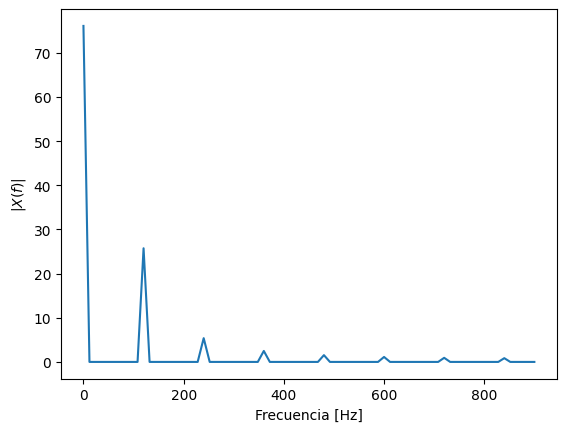

In [ ]:
R_v = 1000 #valores de simulacion de R
C_v = 0 # valores de simulacion de C
Y_RC = Y.subs(R, R_v).subs(C, C_v)

num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en

Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
in_ = in_o * rec_c
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

#FFT
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

#THD
N = len(out)
THD = np.sqrt(np.sum(np.abs(out[2:])**2))/np.abs(out[1])
print('THD =', THD)

# Calcular la distorsión del factor de potencia
DFP = np.sqrt(1 - 1/(1+THD)**2)
print('DFP =', DFP)

plt.plot(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

*Circuito RC serie*

THD = 6344.810567750352
DFP = 0.999999987583597


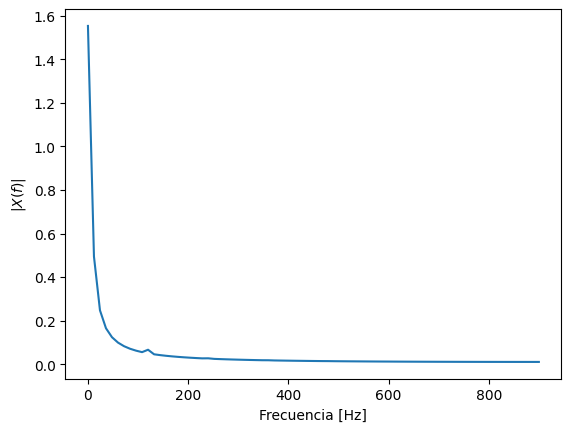

In [ ]:
R_v = 100 #valores de simulacion de R
C_v = 20e-3 # valores de simulacion de C
Y_RC = Y.subs(R, R_v).subs(C, C_v)

num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en

Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
in_ = in_o * rec_c
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

#FFT
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

#THD
N = len(out)
THD = np.sqrt(np.sum(np.abs(out[2:])**2))/np.abs(out[1])
print('THD =', THD)

# Calcular la distorsión del factor de potencia
DFP = np.sqrt(1 - 1/(1+THD)**2)
print('DFP =', DFP)

plt.plot(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

**Ejercicio 2.5**

Digite el indice de modulacion: 0.2


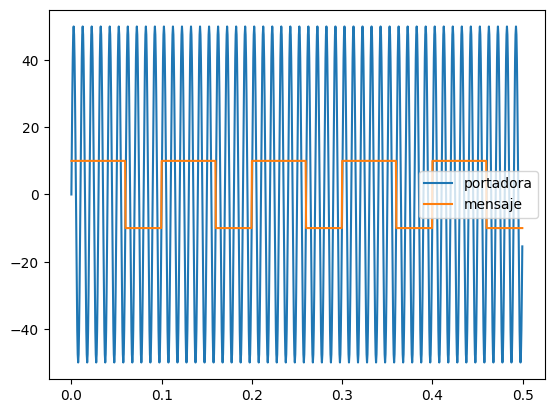

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import signal

#Frecuencia portadora y muestreo
Fc = 100 #frecuencia de portadora
Fm = 10 #frecuencia del mensaje
Am = 10 #amplitud del mensaje

ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 20*Fc #frecuencia muestreo
t = np.arange(ti,tf,1/Fs) #vector del tiempo

# Generación del mensaje tipo pulso rectangular
duty_cycle = 0.6 # ancho del pulso
rect_pulse = signal.square(2*np.pi*Fm*t, duty=duty_cycle) # señal cuadrada
m = Am * rect_pulse # escalamiento para obtener el pulso rectangular

Im = float(input('Digite el indice de modulacion: ')) #Indice de modulacion deseado

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora

plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

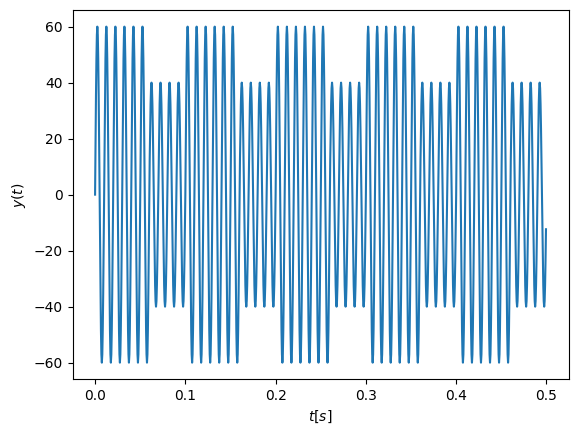

In [ ]:
y = (1+m/Ac)*c #señal modulada en AM

plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

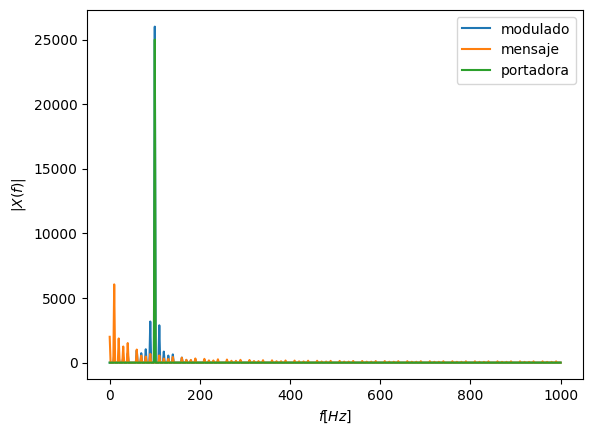

In [ ]:
Xfc = np.fft.rfft(c)
Xfm = np.fft.rfft(m)
Xfy = np.fft.rfft(y)

vfre = np.fft.rfftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.show()